# Part 1

In [1]:
import pandas as pd

# Loading the data from the provided URL with parse_dates parameter
url = 'Files/london_weather_MODIFIED - london_weather_MODIFIED.csv'
df = pd.read_csv(url, parse_dates=['date'])

In [2]:
# Set the date column as the index
df.set_index('date', inplace=True)

In [3]:
# Filtering out only the data from the year 2000 or later and keep the required features
required_features = ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']
df_filtered = df[df.index.year >= 2000][required_features]

In [4]:
# Impute missing values for 'precipitation', 'min_temp', and 'max_temp' using forward-fill
df_filtered['precipitation'].fillna(method='ffill', inplace=True)
df_filtered['min_temp'].fillna(method='ffill', inplace=True)
df_filtered['max_temp'].fillna(method='ffill', inplace=True)

In [5]:
# Impute missing values for 'mean_temp' and 'snow_depth' using interpolation
df_filtered['mean_temp'].interpolate(method='linear', inplace=True)
df_filtered['snow_depth'].interpolate(method='linear', inplace=True)

In [6]:
# Display the data after imputation
print(df_filtered.head())

            precipitation  mean_temp  min_temp  max_temp  snow_depth
date                                                                
2000-01-01            0.0        7.0       4.9      10.8         0.0
2000-01-02            0.2        7.9       5.0      11.5         0.0
2000-01-03            6.0        9.4       7.2       9.5         0.0
2000-01-04            0.2        7.0       4.4      11.0         0.0
2000-01-05            0.8        6.4       1.9      10.8         0.0


# Part 2

### Q1:  What month had the most precipitation between 2000 through 2010?

In [7]:
# Filter out only the data from the year 2000 to 2010 and keep the required features
required_features = ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']
df_filtered = df[(df.index.year >= 2000) & (df.index.year <= 2010)][required_features]

In [8]:
# Resample the data as Monthly frequency
df_monthly = df_filtered.resample('M').sum()

In [9]:
# Find the date and corresponding value for the max precipitation
max_precipitation_date = df_monthly['precipitation'].idxmax()
max_precipitation_value = df_monthly['precipitation'].max()

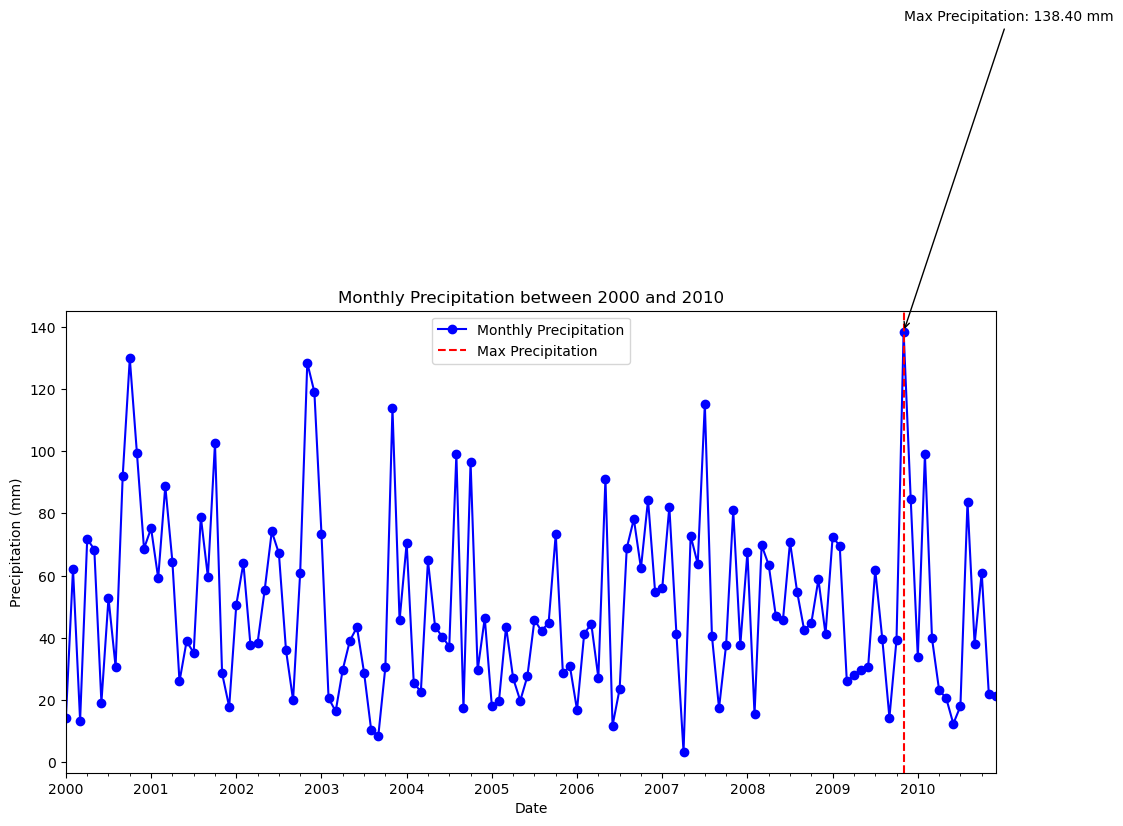

In [10]:
#Import:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the feature and time period for max precipitation
fig, ax = plt.subplots(figsize=(12, 6))
df_monthly['precipitation'].plot(ax=ax, marker='o', color='blue', label='Monthly Precipitation')
ax.axvline(max_precipitation_date, color='red', linestyle='--', label='Max Precipitation')
ax.annotate(f'Max Precipitation: {max_precipitation_value:.2f} mm', xy=(max_precipitation_date, max_precipitation_value),
            xytext=(max_precipitation_date, max_precipitation_value + 100), arrowprops=dict(arrowstyle='->'))
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('Monthly Precipitation between 2000 and 2010')
ax.legend()

In [11]:
#Customize the major xaxis ticks
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', rotation=90)

In [12]:
#Customize the minor xaxis ticks
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))

plt.show()

- **Graph 2:**

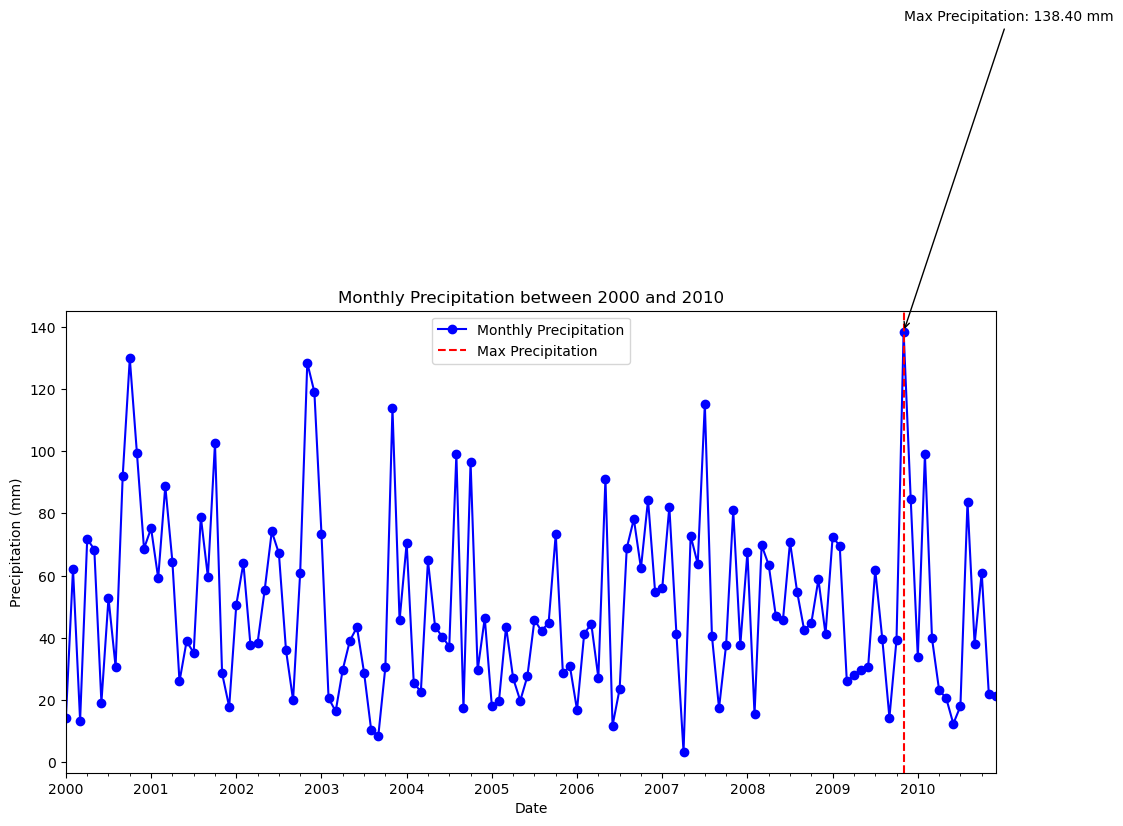

In [13]:
# Plot the feature and time period for max precipitation
fig, ax = plt.subplots(figsize=(12, 6))
df_monthly['precipitation'].plot(ax=ax, marker='o', color='blue', label='Monthly Precipitation')
ax.axvline(max_precipitation_date, color='red', linestyle='--', label='Max Precipitation')
ax.annotate(f'Max Precipitation: {max_precipitation_value:.2f} mm', xy=(max_precipitation_date, max_precipitation_value),
            xytext=(max_precipitation_date, max_precipitation_value + 100), arrowprops=dict(arrowstyle='->'))
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('Monthly Precipitation between 2000 and 2010')
ax.legend()

plt.show()  

### Answer:
- The visualization with the blue dots shows the amount of rain each month from 2000 to 2010. The red dashed line points to the month with the most rain, and the number next to it tells us how much rain fell on that month. So, by looking at the red line, we can see which month had the most rain between 2000 and 2010.

## Yearly Mean Temperature and Lowest Mean Temperature (2000-2020)

In [14]:
# Filter out only the data from the year 2000 to 2020 and keep the required features
df_filtered_q2 = df[(df.index.year >= 2000) & (df.index.year <= 2020)][required_features]

In [15]:
# Resample the data as Yearly frequency
df_yearly = df_filtered_q2.resample('Y').mean()

In [16]:
# Find the date and corresponding value for the lowest mean temperature
lowest_mean_temp_date = df_yearly['mean_temp'].idxmin()
lowest_mean_temp_value = df_yearly['mean_temp'].min()

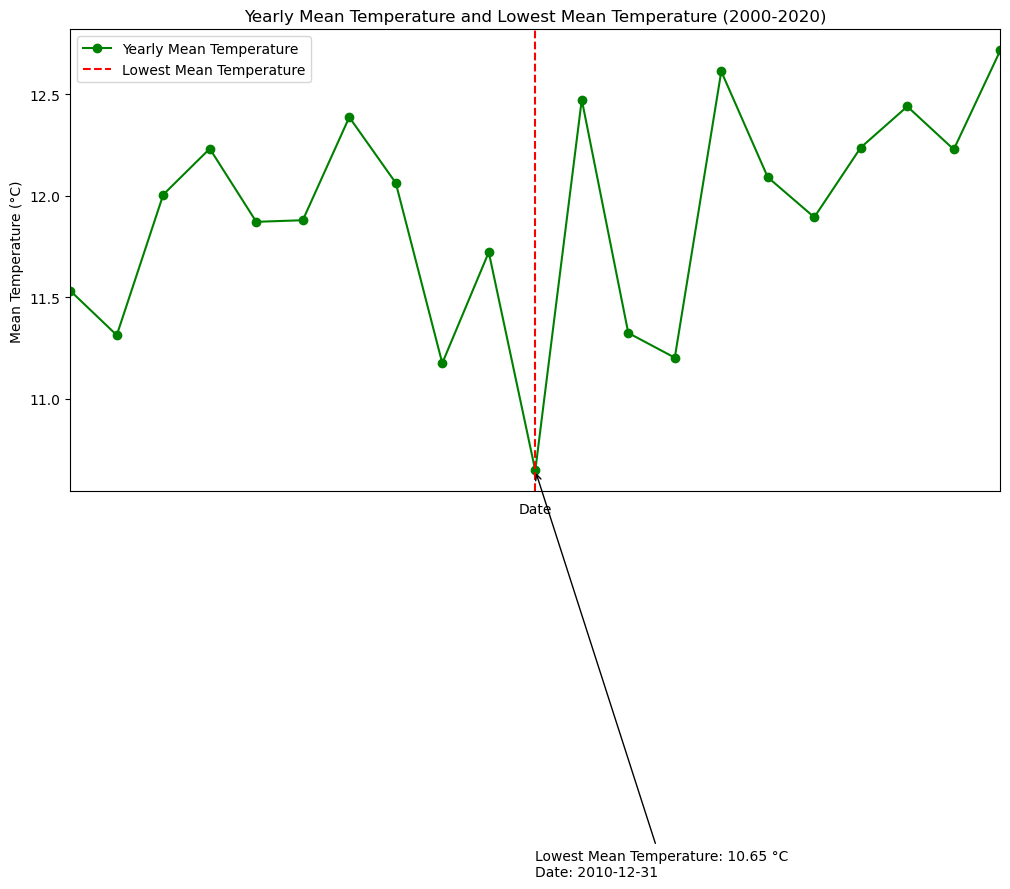

In [17]:
# Plotting the feature and time period for lowest mean temperature
fig, ax = plt.subplots(figsize=(12, 6))
df_yearly['mean_temp'].plot(ax=ax, marker='o', color='green', label='Yearly Mean Temperature')
ax.axvline(lowest_mean_temp_date, color='red', linestyle='--', label='Lowest Mean Temperature')
ax.annotate(f'Lowest Mean Temperature: {lowest_mean_temp_value:.2f} °C\nDate: {lowest_mean_temp_date.strftime("%Y-%m-%d")}', 
            xy=(lowest_mean_temp_date, lowest_mean_temp_value),
            xytext=(lowest_mean_temp_date, lowest_mean_temp_value - 2), arrowprops=dict(arrowstyle='->'))
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature (°C)')
ax.set_title('Yearly Mean Temperature and Lowest Mean Temperature (2000-2020)')
ax.legend()

# Customize the major xaxis ticks
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Modified date format to show only the year
ax.tick_params(axis='x', rotation=90)

# Customize the minor xaxis ticks
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))

plt.show()

- **"The lowest mean temperature recorded between the years 2000 and 2020 was 10.65°C, and this occurred on December 31, 2010."**